## Основные концепции Machine Learning

1) [Регрессия: Предсказать цену телефона](#1.-Регрессия)<br>
2) [Классификация: Операционную систему или год выпуска устройства](#2.-Классификация)<br>
3) [Кластеризация: Количество кластеров и признаки можете выбрать на свое усмотрение](#3.-Кластеризация)

In [ ]:
import numpy as np
import pandas as pd

In [61]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [3]:
phone = pd.read_csv("1.8_phones.csv")

In [50]:
phone

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


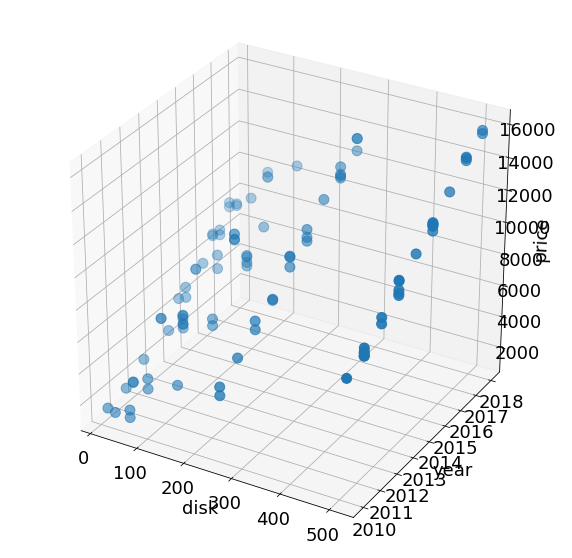

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phone['disk'], phone['year'], phone['price'], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

### 1. Регрессия

In [15]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phone[['disk', 'year']]
y = phone['price']

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [27]:
# Телефон
X[3:4]

,disk,year
3,512,2017


In [26]:
# расчет предсказания цены телефона
reg.predict(X[3:4])[0]

14952.614783923607

### 2. Классификация

In [51]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phone[['disk', 'price']]
y = phone['year']

# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [56]:
# Телефон
X[13:14]

,disk,price
13,128,5416


In [55]:
# проведем классификацию
cl.predict(X[13:14])[0], y[7]

(2013, 2013)

### 3. Кластеризация

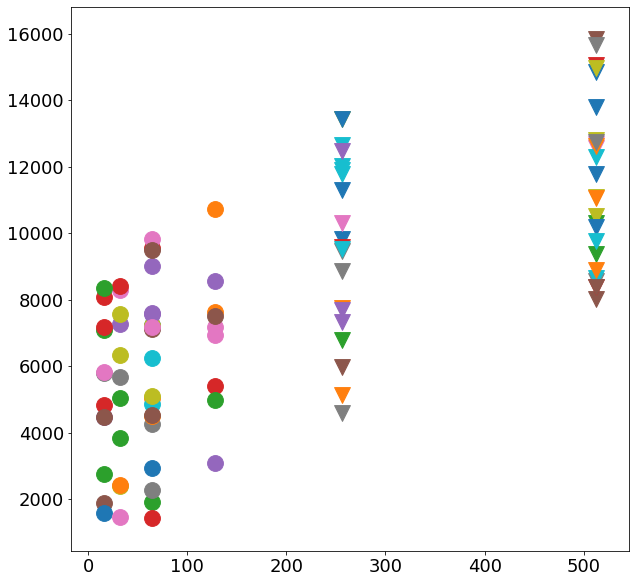

In [60]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phone.disk, phone.price, phone.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [67]:
# выгружаем признаки в отдельную переменную
X = phone[['disk', 'price']]

# создаем модель для кластеризации
clust = KMeans(n_clusters=2).fit(X)

In [69]:
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_

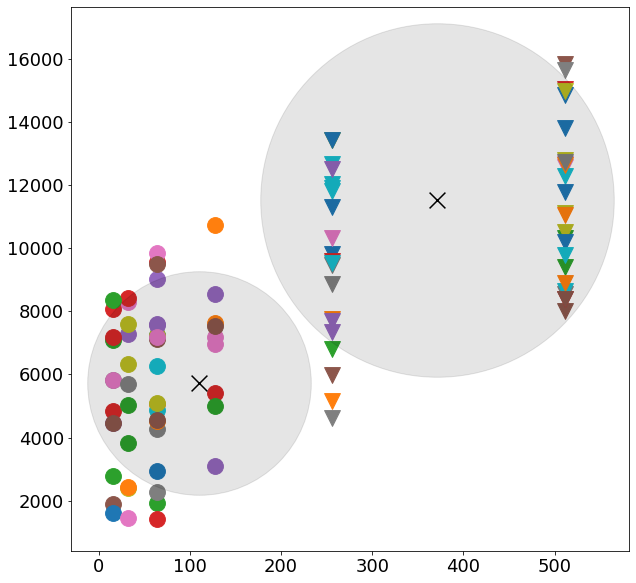

In [76]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phone.disk, phone.price, phone.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 2e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 5e2, c="black", alpha=0.1)


# отображаем картинку
plt.show()